In [2]:
import sys
import cv2
import histogram
import matplotlib.pyplot as plt

filename = 'namecard1.jpg'
    
src = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)

if src is None:
    print('Image load failed!')
    sys.exit()
    
src = cv2.resize(src, (0, 0), fx = 0.5, fy = 0.5)
cv2.imshow('src', src)

hist_img = histogram.getGrayHistImage(histogram.calcGrayHist(src))
hist_img = cv2.cvtColor(hist_img, cv2.COLOR_GRAY2BGR)
cv2.imshow('hist_img', hist_img)


def on_threshold(pos):
    _, dst = cv2.threshold(src, pos, 255, cv2.THRESH_BINARY)
    hist_img2 = hist_img.copy()
    cv2.line(hist_img2, (pos, 0), (pos, 100), (0, 128, 255))
    cv2.imshow('hist_img', hist_img2)
    cv2.imshow('dst', dst)

cv2.namedWindow('dst')
cv2.createTrackbar('Threshold', 'dst', 0, 255, on_threshold)
cv2.setTrackbarPos('Threshold', 'dst', 130)

cv2.waitKey()
cv2.destroyAllWindows()

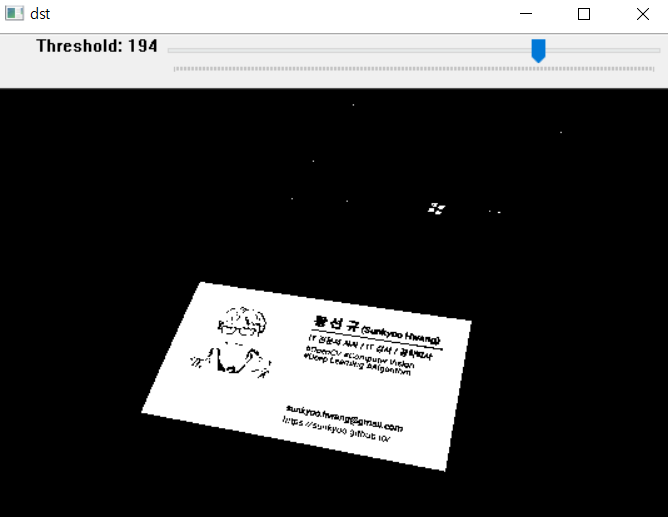
- 위 사진처럼, 임계값을 Trackbar를 통해 , 변경하면서 직관적으로 확인 가능

##### 번외로, matplotlib을 활용하여 histogram 그리기

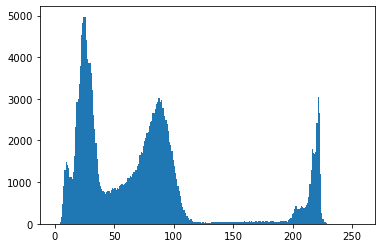

In [13]:
plt.hist(src.ravel(), 256, [0,256])
plt.show()